# Analyse des données de la FAO pour une étude de santé publique

In [1]:
# importation des différentes librairies et base de données
%matplotlib inline
import numpy as np
import pandas as pd
population = pd.read_csv("csv/fr_population.csv")
sousalimentation = pd.read_csv("csv/fr_sousalimentation.csv")
animaux = pd.read_csv("csv/fr_animaux.csv")
vegetaux = pd.read_csv("csv/fr_vegetaux.csv")
cereales = pd.read_csv("csv/fr_céréales.csv")

In [2]:
import matplotlib.pyplot as plt

### Explorons notre table population

In [3]:
population.head(2)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,511,Population totale,2501,Population,2013,2013,1000 personnes,30552,NaN,Donnée officielle
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,202,Afrique du Sud,511,Population totale,2501,Population,2013,2013,1000 personnes,52776,NaN,Donnée officielle


### Explorons notre table animaux

In [4]:
animaux.head(2)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2731,Viande de Bovins,2013,2013,Milliers de tonnes,134.0,S,Données standardisées
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,2013,Milliers de tonnes,6.0,S,Données standardisées


### Explorons notre table vegetaux

In [5]:
vegetaux.head(2)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2511,Blé,2013,2013,Milliers de tonnes,5169.0,S,Données standardisées
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5611,Importations - Quantité,2511,Blé,2013,2013,Milliers de tonnes,1173.0,S,Données standardisées


### Explorons notre table sousalimentation

In [6]:
sousalimentation.head(2)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2012-2014,millions,7.9,F,Estimation FAO,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2013-2015,millions,8.8,F,Estimation FAO,NaN


### Explorons notre table cereales

In [7]:
cereales.head(2)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2511,Blé,2013,2013,Milliers de tonnes,5169,S,Données standardisées
1,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,2,Afghanistan,5511,Production,2805,Riz (Eq Blanchi),2013,2013,Milliers de tonnes,342,S,Données standardisées


In [8]:
population .shape

(175, 14)

In [9]:
population.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,175.000000,175.0,175.0,175.0,175.0,1.750000e+02
mean,126.720000,511.0,2501.0,2013.0,2013.0,4.807996e+04
std,75.168519,0.0,0.0,0.0,0.0,1.786327e+05
min,1.000000,511.0,2501.0,2013.0,2013.0,5.400000e+01
25%,64.500000,511.0,2501.0,2013.0,2013.0,2.543500e+03
50%,121.000000,511.0,2501.0,2013.0,2013.0,9.413000e+03
75%,188.500000,511.0,2501.0,2013.0,2013.0,2.888150e+04
max,351.000000,511.0,2501.0,2013.0,2013.0,1.416667e+06


In [10]:
population.columns

Index(['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')

In [11]:
#déterminons la clé primaire de nos tables
def check_keys(dataset,keys):
    nbr_rows = len(dataset)
    unique_values = len(dataset.groupby(keys).size())
    if nbr_rows == unique_values:
        print("{} est une clé primaire de notre table.".format(keys))
        return True
    else:
        print("{} n'est pas une clé primaire de notre table ." .format(keys))
        return False
    
                        

In [12]:
# clé de la table population
check_keys(population,'Code zone')

Code zone est une clé primaire de notre table.


True

In [13]:
# clé de la table animaux
check_keys(animaux,['Code zone','Code Élément','Code Produit'])

['Code zone', 'Code Élément', 'Code Produit'] est une clé primaire de notre table.


True

In [14]:
# clé de la table vegetaux
check_keys(vegetaux,['Code zone','Code Élément','Code Produit'])

['Code zone', 'Code Élément', 'Code Produit'] est une clé primaire de notre table.


True

In [15]:
# clé de la table sousalimentation
check_keys(sousalimentation,['Code zone','Code année'])

['Code zone', 'Code année'] est une clé primaire de notre table.


True

In [16]:
# clé de la table cereales
check_keys(cereales,['Code zone','Code Produit'])

['Code zone', 'Code Produit'] est une clé primaire de notre table.


True

## Question 1: Calculons le  nombre total d'humain

In [17]:
# convertissons d'abord la population qui est en milliers d'habitant
population['Valeur']*=1000

In [18]:
# sommons les valeurs pour avoir la population mondiale

population['Valeur'].sum()

8413993000

Critique : d'apès wikipédia la population mondiale en 2013 était de **7 milliards** ce qui ne cadre pas avec notre résultat qui est de 8 milliards qui est trop élevée.
vérifions si il existe des redondances dans notre table.

In [19]:
# recherchons les duplications
population.duplicated().value_counts()

False    175
dtype: int64

Pas de doublon à priori

In [20]:
# regardons maintenant les pays dont la population est la plus élevée
population.loc[0:,['Code zone','Zone','Valeur']].sort_values(by = 'Valeur',ascending = False).head(4)

,Code zone,Zone,Valeur
33,351,Chine,1416667000
36,41,"Chine, continentale",1385567000
75,100,Inde,1252140000
55,231,États-Unis d'Amérique,320051000


Ici on constate que la chine et la chinecontinentale font tous deux parties de nos données ce qui est problématique

In [21]:
# trouvons tous les pays qui représentent la chine dans notre table
population[population['Zone'].str.startswith('Chine')].head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
33,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,351,Chine,511,Population totale,2501,Population,2013,2013,1000 personnes,1416667000,A,"Agrégat, peut inclure des données officielles,..."
34,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,96,Chine - RAS de Hong-Kong,511,Population totale,2501,Population,2013,2013,1000 personnes,7204000,NaN,Donnée officielle
35,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,128,Chine - RAS de Macao,511,Population totale,2501,Population,2013,2013,1000 personnes,566000,NaN,Donnée officielle
36,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,41,"Chine, continentale",511,Population totale,2501,Population,2013,2013,1000 personnes,1385567000,NaN,Donnée officielle
37,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,214,"Chine, Taiwan Province de",511,Population totale,2501,Population,2013,2013,1000 personnes,23330000,NaN,Donnée officielle


Dans les données statistiques de la FAO nous constatons qu'il y a bel et bien des redondances. La chine y est représenté en même temps que ses subdivisions. on choisi de conserver la chine et de supprimer ses subdivisions

In [22]:
# suppression des subdivisions de la chine de notre table population
chn = ["Chine - RAS de Hong-Kong","Chine - RAS de Macao", "Chine, continentale","Chine, Taiwan Province de"]
population.drop(population.loc[population['Zone'].isin(chn)].index, inplace = True)

In [23]:
# vérification de la supression
population[population['Zone'].str.startswith('Chine')].head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
33,FBSH,Bilans Alimentaire (Ancienne méthodologie et p...,351,Chine,511,Population totale,2501,Population,2013,2013,1000 personnes,1416667000,A,"Agrégat, peut inclure des données officielles,..."


In [24]:
# population mondiale correct
pop_mondiale = population['Valeur'].sum()
print('La population mondiale est de :{}'.format(pop_mondiale))

La population mondiale est de :6997326000


## Question 2: Retrouvons les redondances des éléments qui constituent le bilan alimenatire
Identifions les redondances, en donnant une réponse sous forme de formule mathématique qui fait intervenir les 11 éléments cités


Les redondances observées dans nos tables sont traduitent par l'équation suivante:
> Disponibilité intérieure = Nourriture + Semences + Pertes + Traitements + Alimentations pour animaux + Autres utilisations(non alimentaires) = production +(Importations - Quantité)+ (variation de stocks)- (Exportations - Quantité)

Vérifions notre équation en prennant le cas du blé.

In [25]:
#sélectionnons uniquement le blé produit en France
vegetaux_France = vegetaux[(vegetaux['Zone']=='France') & (vegetaux['Produit']=='Blé')]

def valeur_element(element):
    return float(vegetaux_France[vegetaux_France['Élément']== element].Valeur)


print(valeur_element('Disponibilité intérieure')*1000000)
print((valeur_element('Production') + valeur_element('Importations - Quantité') + valeur_element('Variation de stock') - valeur_element('Exportations - Quantité'))*1000000)
print((valeur_element('Nourriture') + valeur_element('Semences') + valeur_element('Pertes')+ valeur_element('Traitement') + valeur_element('Aliments pour animaux') +valeur_element('Autres utilisations (non alimentaire)'))*1000000)

20298000000.0
20298000000.0
20298000000.0


## Question 3:
Calculons (pour chaque pays et chaque produit) la disponibilité alimentaire en kcal puis en kg de protéines.

Reunissons les données des tables animaux, végétaux, population

In [26]:
# créons la colonne qui spécifiera l'origine des éléments de notre table 
animaux['Origine'] = 'animal'
vegetaux['Origine']= 'végétal'

In [27]:
# assemblons les tables animaux et végétaux dans une table commune par le biais d'une concaténation
animaux_vegetaux = pd.concat([animaux,vegetaux])

In [28]:
# transformation par un pivot table
table = animaux_vegetaux.pivot_table(index = ['Zone','Code zone','Code Produit','Année','Produit','Origine'], columns = ['Élément'], values = 'Valeur')
table.reset_index(inplace=True)

# suppriomons les duplications de pays dans notre table concaténée
table.drop(table.loc[table['Zone'].isin(chn)].index, inplace = True)


In [29]:
#convertissons chaque élément  en son unité pour homogéniser nos valeurs et ne pas avoir à multiplier par 1000000  chaque fois

list=['Production','Disponibilité intérieure','Nourriture','Importations - Quantité','Aliments pour animaux','Autres utilisations (non alimentaire)','Exportations - Quantité','Pertes','Semences','Variation de stock']
for l in list:
    table[l] *=1000000
table.head(2)

Élément,Zone,Code zone,Code Produit,Année,Produit,Origine,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2,2511,2013,Blé,végétal,NaN,NaN,1369.0,160.23,...,36.91,5.992000e+09,NaN,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,NaN,-350000000.0
1,Afghanistan,2,2513,2013,Orge,végétal,360000000.0,NaN,26.0,2.92,...,0.79,5.240000e+08,NaN,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,NaN,0.0


In [30]:
# jointure de notre nouvelle table(animaux+végétaux) et la table population
table_jointe= pd.merge(table,population[['Zone','Valeur']] , on = ['Zone'], how = 'inner')

In [31]:
# renomnons la nouvelle colonne intégrée à notre table
table_jointe = table_jointe.rename({'Valeur': 'population'}, axis = 1)

In [32]:
# calcul de la disponibilité alimentaire en kcal
table_jointe['dispo_alim_kcal']= table_jointe['Disponibilité alimentaire (Kcal/personne/jour)']*365*table_jointe['population']

In [33]:
# calcul de la disponibilité en kg de protéines
table_jointe['dispo_alim_kgprot']= (table_jointe['Disponibilité de protéines en quantité (g/personne/jour)']*0.001*365)*table_jointe['population']
#table_jointe[table_jointe['Zone']=='Inde']['dispo_alim_kgprot'].sum()

## Question 4: 
Trouvons le ratio energie / poids en kcal/kg. sachant que ratio energie/poids = disponibilité alimentaire en kcal/nourriture

In [34]:
# sélectionnons les colonnes qui nous interessent:
table_ratio = table_jointe[['Produit','dispo_alim_kcal','dispo_alim_kgprot','Nourriture']].copy()
table_ratio.head(2)

,Produit,dispo_alim_kcal,dispo_alim_kgprot,Nourriture
0,Blé,1.526638e+13,411601126.8,4.895000e+09
1,Orge,2.899385e+11,8809669.2,8.900000e+07


In [35]:
#remplacement des 0 par des NaN pour éviter la division par 0
table_ratio.replace(0, np.nan, inplace=True)

In [36]:
#ratio energie poids
table_ratio['ratio_kcal']= table_ratio['dispo_alim_kcal']/table_ratio['Nourriture']


#calculons le ration energie poids en kg de proteine = dispo_alim_kg de proteine/nourriture
table_ratio['ratio_prot']= table_ratio['dispo_alim_kgprot']/table_ratio['Nourriture']
table_ratio

,Produit,dispo_alim_kcal,dispo_alim_kgprot,Nourriture,ratio_kcal,ratio_prot
0,Blé,1.526638e+13,4.116011e+08,4.895000e+09,3118.769381,0.084086
1,Orge,2.899385e+11,8.809669e+06,8.900000e+07,3257.735730,0.098985
2,Maïs,2.341811e+11,6.244829e+06,7.600000e+07,3081.330000,0.082169
3,Millet,3.345444e+10,8.921184e+05,1.200000e+07,2787.870000,0.074343
4,"Céréales, Autres",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
15320,Huiles de Poissons,NaN,NaN,NaN,NaN,NaN
15321,Huiles de Foie de Poisso,NaN,NaN,NaN,NaN,NaN
15322,Riz (Eq Blanchi),1.275686e+11,2.231938e+06,3.600000e+07,3543.572083,0.061998
15323,Lait - Excl Beurre,3.890535e+09,2.150033e+05,6.000000e+06,648.422500,0.035834


In [37]:
#verification avec le ratio de l'oeuf égale en moyenne à 1470kcal/kg
table_ratio_kcal_produit = table_ratio[['Produit','ratio_kcal','ratio_prot']].groupby(['Produit']).mean()
table_ratio_kcal_produit.reset_index(inplace = True)
table_ratio_kcal_produit[table_ratio_kcal_produit['Produit'] =='Oeufs']

,Produit,ratio_kcal,ratio_prot
58,Oeufs,1343.440349,0.105473


In [38]:
#vérifions le ratio proteique de l'avoine 
table_ratio_prot_produit = table_ratio[['Produit','ratio_kcal', 'ratio_prot']].groupby(['Produit']).mean()
table_ratio_prot_produit.reset_index(inplace = True)
table_ratio_prot_produit[table_ratio_prot_produit['Produit']=='Avoine']

,Produit,ratio_kcal,ratio_prot
7,Avoine,2135.35579,0.084294


### Question 5 : Citez 5 aliments parmi les 20 aliments les plus caloriques, en utilisant le ratio énergie/poids

In [39]:
table_ratio_kcal_produit.sort_values('ratio_kcal', ascending = False).head(20)

,Produit,ratio_kcal,ratio_prot
45,Huiles de Foie de Poisso,9982.932500,NaN
42,Huile de Son de Riz,9379.568137,0.006927
43,Huile de Sésame,9314.546692,NaN
46,Huiles de Poissons,9003.715504,NaN
34,Huile d'Arachide,8925.582634,0.010132
38,Huile de Germe de Maïs,8914.635341,0.007495
35,Huile d'Olive,8891.111102,NaN
32,Huil Plantes Oleif Autr,8867.128294,0.011281
40,Huile de Palmistes,8797.863661,0.006703
33,Huile Graines de Coton,8743.068709,0.005643


Les  premiers aliments parmis les 20 les plus calorifique sont: **Huiles de Foie de Poisso, Huile de Son de Riz, Huile de Sésame, Huiles de Poissons, Huile d'Arachide**

### Citez 5 aliments parmi les 20 aliments les plus riches en protéines

In [40]:
table_ratio_prot_produit.sort_values('ratio_prot',ascending = False).head(20)

,Produit,ratio_kcal,ratio_prot
27,Graines Colza/Moutarde,4178.462736,0.285365
81,Soja,3311.134447,0.285156
6,Arachides Decortiquees,5706.928520,0.251573
70,Pois,3475.637480,0.223219
50,Légumineuses Autres,3426.751230,0.220334
31,Haricots,3424.794082,0.216532
87,Sésame,5819.781625,0.176118
0,Abats Comestible,1130.422533,0.175587
95,"Viande, Autre",1294.463333,0.174632
69,"Plantes Oleiferes, Autre",4350.089305,0.172627


Les 5 premiers aliments parmis les 20 les plus riches en proteine sont:**Graines Colza/Moutarde, Soja, Arachides Decortiquees, Pois, Légumineuses Autres**.

## Question 6
Calculons, pour les produits végétaux uniquement, la disponibilité intérieure mondiale exprimée en kcal

In [41]:
# sélectionnons uniquement les produits d'origine végétale.
table_jointe_veg = table_jointe.loc[table_jointe['Origine']== 'végétal', :]


In [42]:
# La disponibilité intérieur devant être donnée en kcal nous aurons besoin de la table des ratios.
# faisons une jointure de nos deux tables
table_jointe_veg = pd.merge(table_jointe_veg,table_ratio_prot_produit, on = 'Produit', how = 'left')
table_jointe_veg['dispo_int_kcal'] = table_jointe_veg['Disponibilité intérieure'] * table_jointe_veg['ratio_kcal']
dispo_int_kcal= table_jointe_veg['dispo_int_kcal'].sum()
dispo_int_kcal

1.3780136677764188e+16

In [43]:
table_jointe_veg['dispo_int_kcal'].describe()

count    1.117100e+04
mean     1.233563e+12
std      1.420747e+13
min     -1.492081e+13
25%      0.000000e+00
50%      1.299327e+10
75%      1.547445e+11
max      8.820138e+14
Name: dispo_int_kcal, dtype: float64

Calculons également, pour les produits végétaux uniquement, la disponibilité intérieure mondiale exprimée en kg

In [44]:
# Avec la disponibilité intérieure d'origine végétale et le ratio en prot trouvons le résultat en kg de proteine
dispo_int_kg = (table_jointe_veg['Disponibilité intérieure']*table_jointe_veg['ratio_prot']).sum()
dispo_int_kg

349177827738.2876

## Question 7:
Combien d'humains pourraient être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture?


In [45]:
# on prendra comme valeur d'apport energétique quotidien nécessaire 2500kcal/j pour avoir le résultat en terme de calorie
besoin_cal_annuel_pers = 2500*365
humains_nouris_kcal = dispo_int_kcal/besoin_cal_annuel_pers
humains_nouris_kcal

15101519646.864864

In [46]:
print("l'équivalent en calories du nombre d'humain que l'on pourrait nourrir est de {} , soit {} % de la population mondiale.".format(round(humains_nouris_kcal, 2), round(humains_nouris_kcal*100/pop_mondiale, 1)))

l'équivalent en calories du nombre d'humain que l'on pourrait nourrir est de 15101519646.86 , soit 215.8 % de la population mondiale.


In [47]:
#poids moyen d'un humain:65kg
#considérons le besoin en protéines  moyen pour une personne= 0.9g/kg/jour à utiliser pour avoir le résultat en terme de kg
besoin_prot_annuel_pers = 0.9*65*0.001*365
humains_nouris_kg = dispo_int_kg/besoin_prot_annuel_pers
humains_nouris_kg

16353018510.164503

In [48]:
print("on peut nourrir {} d'humains en terme de protéine,soit {} % de la population mondiale en 2013".format(humains_nouris_kg,round((humains_nouris_kg/pop_mondiale)*100, 2)))

on peut nourrir 16353018510.164503 d'humains en terme de protéine,soit 233.7 % de la population mondiale en 2013


### Question 8:

Combien d'humains pourraient être nourris si toute la disponibilité alimentaire en produits végétaux la nourriture végétale destinée aux animaux et les pertes de produits végétaux étaient utilisés pour de la nourriture ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [49]:
#créons une liste qui regroupe les trois élément en vue de faciliter la somme de ces élemnets qui représenterons la nourriture totale
#col_list=['Nourriture', 'Aliments pour animaux', 'Pertes']
#table_jointe_veg = table_jointe_veg.copy()

table_jointe_veg['nour_total'] = table_jointe_veg[['Nourriture','Aliments pour animaux', 'Pertes']].sum(axis=1)

In [50]:
# trouvons la nourriture total en kcal
nour_kcal=(table_jointe_veg['nour_total']*table_jointe_veg['ratio_kcal']).sum()/besoin_cal_annuel_pers
nour_kcal

10415832398.520512

In [51]:
# trouvons la nourriture total en kg de proteines
nour_kgprot=(table_jointe_veg['nour_total']*table_jointe_veg['ratio_prot']).sum()/besoin_prot_annuel_pers

In [52]:
print("on peut nourrir {} d'humain en équivalent calorifique soit {}% de la population en 2013".format(nour_kcal,round((nour_kcal/pop_mondiale)*100, 1)))
print("on peut nourrir {} d'humain en équivalent proteines soit {}% de la population en 2013".format(nour_kgprot,round((nour_kgprot/pop_mondiale)*100, 1)))

on peut nourrir 10415832398.520512 d'humain en équivalent calorifique soit 148.9% de la population en 2013
on peut nourrir 10047984897.607779 d'humain en équivalent proteines soit 143.6% de la population en 2013


## Question 9 : 
Combien d'humains pourraient être nourris avec la disponibilité alimentaire mondiale ? Donnez les résultats en termes de calories, puis de protéines, et exprimez ensuite ces 2 résultats en pourcentage de la population mondiale.

In [53]:
#trouvons le nombre de personnes que l'on pourrait nourrir avec la disponibilité alimentaire mondiale en calories
dispo_ali_kcal = table_jointe['dispo_alim_kcal'].sum()
nbr_humain_disp_al_kcal = dispo_ali_kcal/besoin_cal_annuel_pers
print("on peut nourrir {} d'humain en terme de calorie soit {} % de la population mondiale en 2013".format(round(nbr_humain_disp_al_kcal, 2),round((nbr_humain_disp_al_kcal/pop_mondiale)*100, 1)))


on peut nourrir 8070616278.0 d'humain en terme de calorie soit 115.3 % de la population mondiale en 2013


In [54]:
#trouvons le nombre de personne que l'on pourrait nourrir avec la disponibilité alimentaire mondiale en proteines
dispo_ali_kgprot = table_jointe['dispo_alim_kgprot'].sum()
nbr_humain_disp_al_prot = dispo_ali_kgprot/besoin_prot_annuel_pers
print("on peut nourrir {} d'humain en terme de proteines soit {} % de la population mondiale en 2013".format(round(nbr_humain_disp_al_prot, 2),round((nbr_humain_disp_al_prot/pop_mondiale)*100, 1)))

on peut nourrir 9706083340.0 d'humain en terme de proteines soit 138.7 % de la population mondiale en 2013


## Question 10:
A partir des données téléchargées qui concernent la sous-nutrition, determinons la proportion de la population mondiale considérée comme étant en sous-nutrition ?

In [55]:
#supprimons les dupplications de pays dans notre table sous alimentation

sousalimentation.drop(sousalimentation.loc[sousalimentation['Zone'].isin(chn)].index, inplace = True)

In [56]:
#changeons le format des années

sousalimentation['Année']= sousalimentation['Année'].replace({'2012-2014':'2013','2013-2015':'2014','2014-2016':'2015','2015-2017':'2016','2016-2018':'2017'})
sousalimentation.head(2)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20122014,2013,millions,7.9,F,Estimation FAO,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20132015,2014,millions,8.8,F,Estimation FAO,NaN


In [57]:
#convertissons  notre colonne Valeur qui est de types OBJET en numeric pour gérer les cas de valeur <0.1 present dans nos données

sousalimentation['Valeur'] = pd.to_numeric(sousalimentation['Valeur'],errors = 'coerce')

# convertissons la valeur de la population sous alimenté car elle est en million d'habitant
sousalimentation['Valeur']=sousalimentation['Valeur']*1000000


# prenons uniquement les sous-alimentations sur l'année 2013
sousal_annee= sousalimentation[sousalimentation['Année']=='2013']
sousal_annee = sousal_annee.copy()

nbr_pers_sousalimente = sousal_annee['Valeur'].sum()
print("{} d'humain soit, {}% de la population mondiale est considérée comme étant sous-nutrition en 2013".format(round(nbr_pers_sousalimente),round((nbr_pers_sousalimente/pop_mondiale)*100, 2)))

743800000 d'humain soit, 10.63% de la population mondiale est considérée comme étant sous-nutrition en 2013


In [58]:
"""
plt.rcdefaults()

values = [round((nbr_pers_sousalimente/pop_mondiale)*100), prop_anim_cer]
colors = ['m','g']
explode = [ 0, 0.01]
labels = ["Proportion de céréale pour l'alimentation humaine", "Proportion de céréale pour l'alimentation animale"]
plt.pie(values, colors= colors, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True)
plt.title('Repartion de céréale')
plt.show()
"""

'\nplt.rcdefaults()\n\nvalues = [round((nbr_pers_sousalimente/pop_mondiale)*100), prop_anim_cer]\ncolors = [\'m\',\'g\']\nexplode = [ 0, 0.01]\nlabels = ["Proportion de céréale pour l\'alimentation humaine", "Proportion de céréale pour l\'alimentation animale"]\nplt.pie(values, colors= colors, labels=labels, explode = explode, autopct=\'%1.1f%%\', shadow=True)\nplt.title(\'Repartion de céréale\')\nplt.show()\n'

#### travail sur la table céréales

In [59]:
# supprimons les duplications de pays dans notre table céréales
cereales.drop(cereales.loc[cereales['Zone'].isin(chn)].index, inplace = True)

In [60]:
# Sur la table céréale, affichons les codes produits et produits
cereales_reduit = cereales[["Code Produit","Produit"]].drop_duplicates(subset=["Code Produit", "Produit"])
cereales_reduit

,Code Produit,Produit
0,2511,Blé
1,2805,Riz (Eq Blanchi)
2,2513,Orge
3,2514,Maïs
4,2517,Millet
9,2515,Seigle
10,2516,Avoine
12,2518,Sorgho
13,2520,"Céréales, Autres"


In [61]:
# créons une colonne nommée 'is-cereal' dans notre table jointe
table_jointe['is_cereal'] = table_jointe['Produit'].isin( cereales_reduit['Produit'])

#### Liste des produits considérés comme des céréales selon la FAO

In [62]:
#filtrons uniquement les éléments ayant une correspondance avec les céréales
table_cereal=table_jointe[table_jointe["is_cereal"]==True]
table_cereale= table_cereal.groupby(['Produit','Code Produit']).size().reset_index().rename(columns={0:'count'})
table_cereale[['Produit','Code Produit']]

,Produit,Code Produit
0,Avoine,2516
1,Blé,2511
2,"Céréales, Autres",2520
3,Maïs,2514
4,Millet,2517
5,Orge,2513
6,Riz (Eq Blanchi),2805
7,Seigle,2515
8,Sorgho,2518


## Question 11:
En ne prenant en compte que les céréales destinées à l'alimentation (humaine et animale), quelle proportion (en termes de poids) est destinée à l'alimentation animale ?

In [63]:
#trouvons la quantité de céréales destinées à l'alimentation humaine
nour_cer = table_cereal['Nourriture'].sum()

In [64]:
#trouvons la quantité de céréales destinées  l'alimentation animale
anim_cer = table_cereal['Aliments pour animaux'].sum()

In [65]:
proportion_cereale_humaine = round(nour_cer/(nour_cer+anim_cer),2)
proportion_cereale_humaine

0.54

In [66]:
#proportion de céréale destinée à l'alimentation animale
prop_anim_cer = round(anim_cer/(nour_cer+anim_cer),2)
print("{} % de céréales sont destinées à l'alimentation pour animaux en ne prenant en compte que les céréales destinées à l'alimentation humaine et animale".format(prop_anim_cer*100))


46.0 % de céréales sont destinées à l'alimentation pour animaux en ne prenant en compte que les céréales destinées à l'alimentation humaine et animale


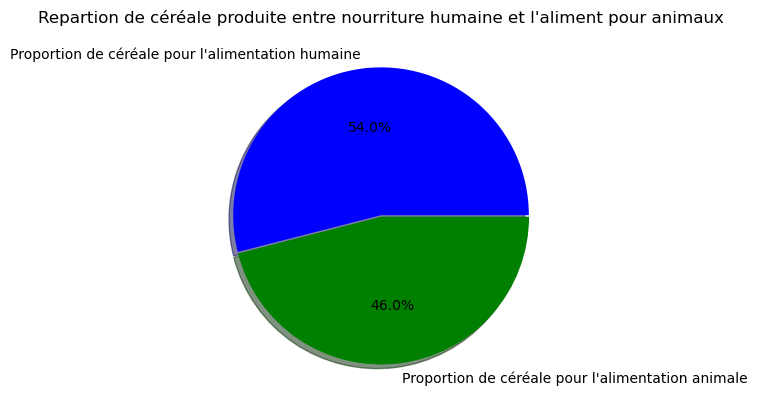

In [67]:


plt.rcdefaults()

values = [proportion_cereale_humaine, prop_anim_cer]
colors = ['b','g']
explode = [ 0, 0.01]
labels = ["Proportion de céréale pour l'alimentation humaine", "Proportion de céréale pour l'alimentation animale"]
plt.pie(values, colors= colors, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True)
plt.title("Repartion de céréale produite entre nourriture humaine et l'aliment pour animaux")
plt.show()


Sélectionnez parmi les données des bilans alimentaires les informations relatives aux pays dans lesquels la FAO recense des personnes en sous-nutrition.

In [68]:
# trouvons la liste des pays ou l'on recence des personnes en sous-nutrition
sousalimentation_pays = sousalimentation.loc[sousalimentation['Valeur']> 0 ,'Zone'].unique()
sousalimentation_pays

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Angola',
       'Arabie saoudite', 'Argentine', 'Arménie', 'Bangladesh', 'Bénin',
       'Bolivie (État plurinational de)', 'Botswana', 'Bulgarie',
       'Burkina Faso', 'Cambodge', 'Cameroun', 'Chili', 'Chine',
       'Colombie', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Djibouti',
       'Égypte', 'El Salvador', 'Émirats arabes unis', 'Équateur',
       'Eswatini', 'Éthiopie', 'Gabon', 'Gambie', 'Géorgie', 'Ghana',
       'Guatemala', 'Guinée', 'Guinée-Bissau', 'Haïti', 'Honduras',
       'Inde', 'Indonésie', "Iran (République islamique d')", 'Iraq',
       'Jamaïque', 'Jordanie', 'Kenya', 'Kirghizistan', 'Koweït',
       'Lesotho', 'Liban', 'Libéria', 'Madagascar', 'Malaisie', 'Malawi',
       'Mali', 'Maroc', 'Mauritanie', 'Mexique', 'Mongolie', 'Mozambique',
       'Myanmar', 'Namibie', 'Népal', 'Nicaragua', 'Niger', 'Nigéria',
       'Oman', 'Ouganda', 'Ouzbékistan', 'Pakistan', 'Panama', 'Paraguay',
       'Pérou', '


Repérez les 15 produits les plus exportés par ce groupe de pays

In [69]:
# Sélectionnons les lignes qui correspondent aux pays ressencés pour la sous nutrition 
table_jointe_groupe_pays_sousal=table_jointe.loc[table_jointe['Zone'].isin (sousalimentation_pays), :]
table_jointe_groupe_pays_sousal.head(2)

,Zone,Code zone,Code Produit,Année,Produit,Origine,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,population,dispo_alim_kcal,dispo_alim_kgprot,is_cereal
0,Afghanistan,2,2511,2013,Blé,végétal,NaN,NaN,1369.0,160.23,...,4.895000e+09,775000000.0,5.169000e+09,322000000.0,NaN,-350000000.0,30552000,1.526638e+13,411601126.8,True
1,Afghanistan,2,2513,2013,Orge,végétal,360000000.0,NaN,26.0,2.92,...,8.900000e+07,52000000.0,5.140000e+08,22000000.0,NaN,0.0,30552000,2.899385e+11,8809669.2,True


In [70]:
# Sélectionnons uniquement les exportations par produit
exportation = table_jointe_groupe_pays_sousal[['Exportations - Quantité','Produit']].groupby(['Produit']).sum()
table_exportation = exportation.sort_values('Exportations - Quantité', ascending =False).head(15)
table_exportation.reset_index(inplace =True)
table_exportation

,Produit,Exportations - Quantité
0,Maïs,5.470400e+10
1,Huile de Palme,4.632200e+10
2,Manioc,3.592300e+10
3,Blé,3.333100e+10
4,Riz (Eq Blanchi),3.282700e+10
5,Sucre Eq Brut,2.552700e+10
6,"Légumes, Autres",2.011800e+10
7,Bananes,1.783000e+10
8,Soja,1.590100e+10
9,Lait - Excl Beurre,1.550600e+10


In [71]:
# liste de ces produits importés 
liste_produit = table_exportation['Produit']

sélectionnez les 200 plus grandes importations de ces produits (1 importation = une quantité d'un produit donné importée par un pays donné)

In [72]:
# trouvons la correspondance des produits de notre liste dans notre table jointe
table_jointe_export_pays_sousal = table_jointe.loc[table_jointe['Produit'].isin(liste_produit), :]

In [73]:
#sélectionnons uniquement les 200 premières importations
importation_pays_sousali = table_jointe_export_pays_sousal.sort_values('Importations - Quantité',ascending =False).head(200)
importation_pays_sousali[['Produit','Importations - Quantité']]

,Produit,Importations - Quantité
3014,Soja,6.556400e+10
3001,Manioc,3.046600e+10
6744,Maïs,1.440300e+10
607,Orge,1.054700e+10
14779,Blé,1.033100e+10
...,...,...
2805,Maïs,1.035000e+09
2172,Lait - Excl Beurre,1.032000e+09
978,Blé,1.031000e+09
2899,Blé,1.022000e+09


In [74]:
# sélectionnons les colonnes qui nous seront utiles pour la suite de nos calculs
importation_pays_sousali = importation_pays_sousali[['Produit','Importations - Quantité','Nourriture','Aliments pour animaux','Autres utilisations (non alimentaire)','Disponibilité intérieure']]

#Groupons ces importations par produit
importation_pays_sousali = importation_pays_sousali.groupby('Produit').sum()
importation_pays_sousali.reset_index(inplace=True)


In [75]:
# affichons les 15 produits des 200 les plus importés et  ayant les plus grandes exportations
importation_pays_sousali[['Produit','Importations - Quantité']]

,Produit,Importations - Quantité
0,Bananes,9.663000e+09
1,Blé,1.501400e+11
2,"Fruits, Autres",1.695100e+10
3,Huile de Palme,3.105500e+10
4,Lait - Excl Beurre,9.102300e+10
5,"Légumes, Autres",2.962500e+10
6,Manioc,3.475100e+10
7,Maïs,1.024890e+11
8,Orge,2.251500e+10
9,Poissons Pelagiques,1.437100e+10


In [76]:
# calculons le ratio entre la quantité destinés aux "Autres utilisations" (Other uses) et la disponibilité intérieure.
importation_pays_sousali['ratio_autre_uti_dispo_int']=importation_pays_sousali['Autres utilisations (non alimentaire)']/importation_pays_sousali['Disponibilité intérieure']
importation_pays_sousali.head()

,Produit,Importations - Quantité,Nourriture,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité intérieure,ratio_autre_uti_dispo_int
0,Bananes,9.663000e+09,7.123000e+09,0.000000e+00,0.000000e+00,7.466000e+09,0.000000
1,Blé,1.501400e+11,3.037200e+11,9.871500e+10,1.512500e+10,4.603270e+11,0.032857
2,"Fruits, Autres",1.695100e+10,6.848400e+10,0.000000e+00,1.200000e+07,7.452400e+10,0.000161
3,Huile de Palme,3.105500e+10,6.922000e+09,0.000000e+00,1.974700e+10,2.688600e+10,0.734471
4,Lait - Excl Beurre,9.102300e+10,3.320100e+11,2.913300e+10,1.247900e+10,3.780210e+11,0.033011


In [77]:
# Calculons le ratio entre la quantité destinée à la nourriture animale et la quantité destinée à la nourriture (animale + humaine)
importation_pays_sousali['ratio_alianimaux_alimentanihumain'] = importation_pays_sousali['Aliments pour animaux']/(importation_pays_sousali['Aliments pour animaux']+importation_pays_sousali['Nourriture'])
importation_pays_sousali

,Produit,Importations - Quantité,Nourriture,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité intérieure,ratio_autre_uti_dispo_int,ratio_alianimaux_alimentanihumain
0,Bananes,9.663000e+09,7.123000e+09,0.000000e+00,0.000000e+00,7.466000e+09,0.000000,0.000000
1,Blé,1.501400e+11,3.037200e+11,9.871500e+10,1.512500e+10,4.603270e+11,0.032857,0.245294
2,"Fruits, Autres",1.695100e+10,6.848400e+10,0.000000e+00,1.200000e+07,7.452400e+10,0.000161,0.000000
3,Huile de Palme,3.105500e+10,6.922000e+09,0.000000e+00,1.974700e+10,2.688600e+10,0.734471,0.000000
4,Lait - Excl Beurre,9.102300e+10,3.320100e+11,2.913300e+10,1.247900e+10,3.780210e+11,0.033011,0.080669
5,"Légumes, Autres",2.962500e+10,5.057570e+11,3.956200e+10,1.900000e+07,5.906750e+11,0.000032,0.072548
6,Manioc,3.475100e+10,1.526800e+10,2.515300e+10,2.035500e+10,6.734100e+10,0.302268,0.622276
7,Maïs,1.024890e+11,5.595000e+10,4.028870e+11,1.821180e+11,7.011040e+11,0.259759,0.878061
8,Orge,2.251500e+10,3.650000e+08,2.016000e+10,1.200000e+07,2.960000e+10,0.000405,0.982217
9,Poissons Pelagiques,1.437100e+10,4.052000e+09,1.309700e+10,4.000000e+07,1.719000e+10,0.002327,0.763718


### Question 12 :
Donnez les 3 produits qui ont la plus grande valeur pour chacun des 2 ratios (vous aurez donc 6 produits à citer)

In [78]:
#liste des 3 premiers hauts ratio autres utilisations/disponibilité intérieure
importation_pays_sousali.sort_values('ratio_autre_uti_dispo_int', ascending = [False]).loc[:,['Produit','ratio_autre_uti_dispo_int']].head(3)

,Produit,ratio_autre_uti_dispo_int
3,Huile de Palme,0.734471
6,Manioc,0.302268
7,Maïs,0.259759


In [79]:
#liste des 3 premiers hauts ratio aliments pour animaux/aliments pour animaux + la nourriture
importation_pays_sousali.sort_values('ratio_alianimaux_alimentanihumain', ascending = [False]).loc[:,['Produit','ratio_alianimaux_alimentanihumain']].head(3)


,Produit,ratio_alianimaux_alimentanihumain
8,Orge,0.982217
7,Maïs,0.878061
9,Poissons Pelagiques,0.763718


## Question 13 : 
Combien de tonnes de céréales pourraient être libérées si les USA diminuaient leur production de produits animaux de 10% ?

In [80]:
#trouvons la production animale libérée si baisse de 10%
quant_lib_alim_animaux= (table_cereal[table_cereal['Zone']=="États-Unis d'Amérique"]['Aliments pour animaux']).sum()*0.1

print('si la production de produit animaux des USA était diminué de 10% cela libèrerait {} tonnes de céréales'.format(quant_lib_alim_animaux/1000))

si la production de produit animaux des USA était diminué de 10% cela libèrerait 14009600.0 tonnes de céréales


## Question 14:
En Thaïlande, quelle proportion de manioc est exportée ? Quelle est la proportion de personnes en sous-nutrition?

In [81]:
#Trouvons la quantité de manioc exporté en Thaïlande
manioc_expot_thai =int(animaux_vegetaux.loc[(animaux_vegetaux['Zone']=='Thaïlande') & (animaux_vegetaux['Produit']=='Manioc') & (animaux_vegetaux['Élément']=='Exportations - Quantité'),'Valeur'])
manioc_expot_thai

25214

In [82]:
#Trouvons la production de manioc en Thaïlande
manioc_production_thai =int(animaux_vegetaux.loc[(animaux_vegetaux['Zone']=='Thaïlande') & (animaux_vegetaux['Produit']=='Manioc') & (animaux_vegetaux['Élément']=='Production'),'Valeur'])                    
manioc_production_thai

30228

In [83]:
#Trouvons le nombre de personnes sous alimenté en Thaïlande
nbr_sousaliment_thaïlande = float(sousal_annee.loc[(sousal_annee['Zone']=='Thaïlande'),'Valeur'])
nbr_sousaliment_thaïlande

5600000.0

In [84]:
#La population de la Thaïlande
population_thaïlande= int(population.loc[population['Zone']=='Thaïlande', 'Valeur'])
population_thaïlande

print('la Thaïlande a exporté {} de tonnes de manioc soit {} % par rapport à la production totale en 2013 et {} % de la population de ce pays sont en sous alimentation'.format(manioc_expot_thai/1000,round((manioc_expot_thai/manioc_production_thai)*100, 2), round((nbr_sousaliment_thaïlande/population_thaïlande)*100, 1)))

la Thaïlande a exporté 25.214 de tonnes de manioc soit 83.41 % par rapport à la production totale en 2013 et 8.4 % de la population de ce pays sont en sous alimentation


## Question 15-18: Transformation des tables pour les requetes SQL
Créons les tables qui alimenterons notre base de données:


* Une table appelée population, contenant la population de chaque pays pour 2013. Elle contient 4 colonnes : pays, code_pays, annee, population.

In [85]:
# sélectionnons les colonnes dont on a besoin

popu= population[['Zone','Code zone','Année','Valeur']]

# renommons nos colonnes
popu.columns =['pays','code_pays','annee','population']

# déterminons la clé primaire de la table popu
check_keys(popu,'pays')

# exportons notre dataframe via un fichier csv 
popu.to_csv('population.csv',index= False)

pays est une clé primaire de notre table.


* la table appelée dispo_alim contenant pour chaque pays et pour chaque produit en 2013, les informations suivantes:
les colonnes : pays, code_pays, année, produit, code_produit, origin, dispo_alim_tonnes, dispo_alim_kcal_p_j, dispo_prot, dispo_mat_gr .

In [86]:
#sélectionnons les colonnes qui nous interessent dans la table 
dispo_alim = table[['Zone','Code zone','Année','Produit','Code Produit','Origine','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)','Disponibilité de matière grasse en quantité (g/personne/jour)']]

# renommons nos colonnes
dispo_alim.columns=['pays','code_pays','annee','produit','code_produit','origin','dispo_alim_tonnes','dispo_alim_kcal_p_j','dispo_prot', 'dispo_mat_gr']

# déterminons la clé primaire de la table dispo_alim
check_keys(dispo_alim,['pays','produit'])

# exportons notre dataframe via un fichier csv 
dispo_alim.to_csv('dispo_alim.csv',index=False)

['pays', 'produit'] est une clé primaire de notre table.


* la table appelée equilibre_prod contenant pour chaque pays et pour chaque produit en 2013, les colonnes suivantes : pays, code_pays, année, produit, code_produit, dispo_int, alim_ani, semences, pertes, transfo, nourriture, autres_utilisations.

In [87]:
# sélectionnons les colonnes pertinantes dans la table 
equilibre_prod = table[['Zone','Code zone','Année','Produit','Code Produit','Disponibilité intérieure','Aliments pour animaux','Semences','Pertes','Traitement','Nourriture','Autres utilisations (non alimentaire)']]

# renommons nos colonnes
equilibre_prod.columns=['pays','code_pays','annee','produit','code_produit','dispo_int','alim_ani','semences','pertes', 'transfo','nourriture','autres_utilisations']

# déterminons la clé primaire de la table equilibre_prod
check_keys(equilibre_prod,['pays','produit'])

#exportons notre dataframe via un fichier csv 
equilibre_prod.to_csv('equilibre_prod.csv', index = False)

['pays', 'produit'] est une clé primaire de notre table.


* la table appelée sous_nutrition, contenant le nombre de personnes en sous-alimentation pour chaque pays en 2013. Avec 4 colonnes : pays, code_pays, année, nb_personnes.

In [88]:
# sélectionnons les colonnes de notre futur table dans la table sousalimentation_annee
sous_alimentation = sousal_annee[['Zone','Code zone','Année','Valeur']]
sous_alimentation.columns =['pays','code_pays','annee','nb_personnes']

# déterminons la clé primaire de la table sousalimentation_pays
check_keys(sous_alimentation,'pays')

# exportons notre dataframe via un fichier csv 
sous_alimentation.to_csv('sous_alimentation.csv',index = False)

pays est une clé primaire de notre table.


### Question 20
Pour quelques uns des produits identifiés dans la dernière requête SQL, les "autres utilisations" possibles des produits figurants sur la liste sont: (Issu de la recherche internet)

- **L'alcool non commestible** est utisé à des fins médicales.
- **Les plantes aquatiques** servent aux maintien de l'écosysthème aquatique(fournissent de l'oxygène et luttent contre la prolifération des algues. 
- **L'huile de palme** est utilisée comme agro-carburant et dans l'oléochimie pour fabrication des produits cosmétiques. 
- **L'huile de pante Oleifère** : usage phamaceutique,cosmétique.
